# ACLR Data Group Exploratory Data Analysis
### Jessica Ni, Maya Uwaydat, Wissal Khlouf

## Audience/Stakeholder

Our report is intended for a general audience, and we hope to make it comprehensible for people aged 12-20 like the patients represented in the study. We will simplify medical jargon and create streamlined data visualizations in formats familiar to most people, but most importantly, the patient reading their report. 

## Problem Statement

Young athletes who have undergone ACLR may find it difficult to interpret their recovery and performance data, especially when presented with technical terms. How can we educate young athletes about their recovery progress and expectations of athletic performance based on patients similar to them?

## Important Variables

#### acl_rsi
* Anterior cruciate ligament return-to-sport after injury survey. Patients are given a survey (the “ACL-RSI” survey) where they answer questions related to “appraisal,” “confidence,” and “emotions,” and their psychological readiness score is calculated out of one hundred points. Though our report largely focuses on athletes’ performance after ACLR, psychological readiness remains relevant because suffering an athletic injury and undergoing surgery will affect a person beyond the physical dimension of their sport. 

#### lsi_ext_isok_60
* Limb symmetry index (abbreviated as “`lsi`” in our variable names) for isokinetic (“`isok`”) extension strength (“`ext`”) at a sixty-degree angle (“`60`”). We choose to include `lsi_ext_isok_60` as an objective measure of athletes’ strength post-ACLR (which would relate to athletic performance).
  * Isokinetic strength is measured in torque. 
  * Limb symmetry index is a percentage value calculated by measuring the torque of the involved (i.e. affected) limb, measuring the torque of the contralateral limb, dividing the involved limb value by the contralateral limb value, and multiplying by one hundred. 
  * The patient bends their leg backwards sixty degrees for isokinetic strength measurements. 

#### lsi_flex_isok_60
* Limb symmetry index (“`lsi`”) for isokinetic (“`isok`”) flexion strength (“`flex`”) at a sixty-degree angle (“`60`”). The patient bends their leg forward sixty degrees (i.e. back its original position) for isokinetic strength measurements, but limb symmetry index is calculated the same way. We include `lsi_flex_isok_60` in our report for the same purpose as `lsi_ext_isok_60`. 

#### sh_lsi
* "Single hop" ("`sh`") limb symmetry index ("`lsi`"). Included in our dataset because it measures patients’ abilities while they are engaged in movements similar to when they play sports.
  * a patient hopped once on their afflicted limb, then they hopped once on the contralateral limb. 
  * The hop distances were taken in metres, and the involved limb value was divided by the contralateral limb value and multiplied by one hundred. 

Notably, our dataset did not contain a control group that did not undergo ACLR, so we cannot assess the benefits of the procedure from our data alone. 

## Understanding and Cleaning Dataset

In [26]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
# Load in data
data = pd.read_csv('../data/aclr_data.csv')
data.head()

,record_id,redcap_event_name,redcap_repeat_instrument,sex_dashboard,graft_dashboard2,med_meniscus,lat_meniscus,lat_stab,physis,visit_sex,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,baseline_arm_1,NaN,Male,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,...,NaN,2.57,2.92,87.86,1.50,1.45,103.32,2.0,NaN,NaN
2,1,long_term_outcomes_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.0
3,2,baseline_arm_1,NaN,Female,HS autograft,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,...,NaN,0.97,2.16,45.00,0.88,1.20,72.98,2.0,NaN,NaN


In [28]:
# Let's see the shape.
data.shape
# 11149 observations and 63 features

(11150, 63)

In [29]:
# That is a lot of observations. Are there 11149 separate patients?
print(data['record_id'].nunique())
results1 = data['record_id'].value_counts().describe()

table = pd.DataFrame(results1) # this will show the results as a table format
display(table) 

# We see that there are 4739 unique patients and each patient may have multiple entries
# Subjects have an average of 2 visits

4739


,count
count,4739.000000
mean,2.352817
std,1.147803
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,17.000000


In [30]:
# Seeing what variables we are working with 
# (Just to check which are categorical)

data.select_dtypes(include=['object', 'category', 'string']).head(n=3)

,redcap_event_name,sex_dashboard,graft_dashboard2,visit_sex,visit_graft,age_group_dashboard_use,tss_dashboard,reinjury
0,baseline_arm_1,Male,Other,NaN,NaN,NaN,NaN,NaN
1,visit_1_arm_1,NaN,NaN,Male,Other,21 to 25 years,13 to 24 months,No
2,long_term_outcomes_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# This will which variables are numerical/continuous.

data.select_dtypes(include=['int64', 'float64']).head(n=3)

,record_id,redcap_repeat_instrument,med_meniscus,lat_meniscus,lat_stab,physis,age,age_group,age_group_dashboard,height_m,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,21.7,5.0,5.0,1.9,...,NaN,2.57,2.92,87.86,1.5,1.45,103.32,2.0,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.0


In [32]:
# First, let's keep only the columns we are interested in
data = data[['record_id', 'redcap_event_name', 'sex_dashboard', 'visit_sex', 'age', 'age_group', 'acl_rsi', 'lsi_ext_isok_60', 'lsi_flex_isok_60', 'sh_lsi', 'rts', 'rts_tss']]

In [33]:
# Let's make sure all the columns are the correct data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11150 entries, 0 to 11149
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          11150 non-null  int64  
 1   redcap_event_name  11150 non-null  object 
 2   sex_dashboard      4737 non-null   object 
 3   visit_sex          5234 non-null   object 
 4   age                5126 non-null   float64
 5   age_group          5126 non-null   float64
 6   acl_rsi            3400 non-null   float64
 7   lsi_ext_isok_60    2227 non-null   float64
 8   lsi_flex_isok_60   2222 non-null   float64
 9   sh_lsi             2442 non-null   float64
 10  rts                686 non-null    float64
 11  rts_tss            671 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.0+ MB


In [34]:
# Let's spot missing values
data.isnull().sum()

record_id                0
redcap_event_name        0
sex_dashboard         6413
visit_sex             5916
age                   6024
age_group             6024
acl_rsi               7750
lsi_ext_isok_60       8923
lsi_flex_isok_60      8928
sh_lsi                8708
rts                  10464
rts_tss              10479
dtype: int64

<Axes: >

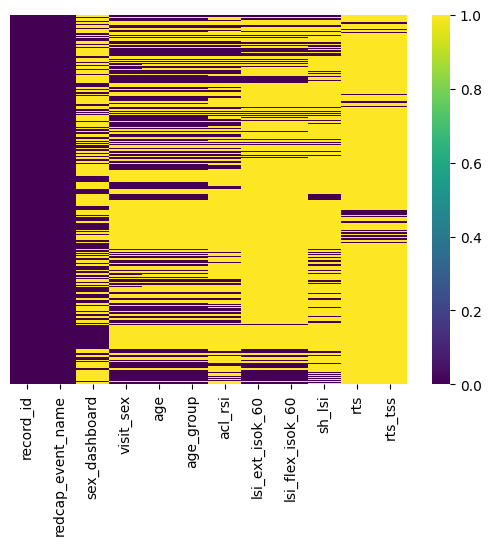

In [35]:
# Let's visualize where the missing values lie
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)

# The yellow values show missing information.
# Record ID and event description have no missing values
# It seems that many of the numerical measurements are missing, likely because there are multiple entries per subject.

In [36]:
# Let's start by filling data that is already known based on the subject's first entry

# Since we know that there are multiple entries per subject and each entry has at least an ID associated with it, 
# We will start by filling in known cells, such as the sex based on the first occurrence 

# Here, for each patient, we filled in sex based on the sex listed in their first visit

data['sex_dashboard'] = data.groupby('record_id')['sex_dashboard'].transform('first')
data['sex_dashboard'] = data['sex_dashboard'].fillna('Unknown')

In [37]:
# Next, we noticed that within the event column, the first event called baseline_arm_1 has missing values for everything except the patient's sex,
# So, we will remove all of those observations since we already filled in sex in the code chunk above
data[data['redcap_event_name'] == 'baseline_arm_1'].head()

data = data[data['redcap_event_name'] != 'baseline_arm_1']

In [38]:
# Additionally, where there is an event called long_term_outcomes_arm_1, it just includes two pieces of information called rts (return to sport) 
# and rts_tss, so we will move those values to its own dataframe if needed later
data = data.drop(columns=['rts', 'rts_tss'])

rts_df = data[data['redcap_event_name'] == 'long_term_outcomes_arm_1']
data = data[data['redcap_event_name'] != 'long_term_outcomes_arm_1']

In [39]:
# Drop extra sex column
data = data.drop(columns=['visit_sex'])

In [40]:
# Let's make sure nothing is duplicated
data.duplicated().value_counts()

False    5239
Name: count, dtype: int64

<Axes: >

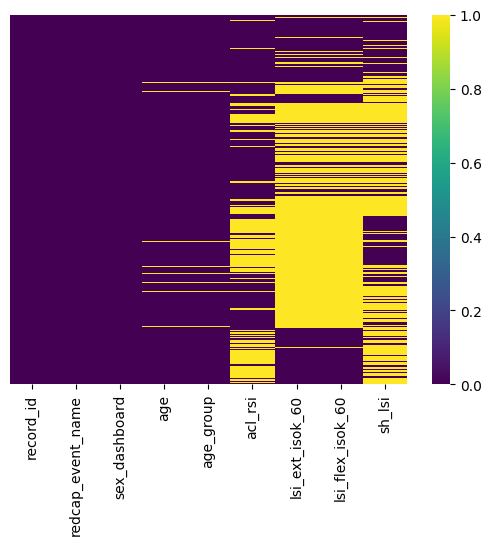

In [41]:
# Let's check how the missing values look now! 
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)
# It looks much better. 

Our dataset is longitudinal, and patients come in at irregular time intervals. Missing values for certain tests (like LSI or hop tests) during later visits are very common because not all tests are performed at each visit (meaning NaNs are not random). 

We have decided to leave missing values without imputing them. Usually, test outcomes should improve as a patient is recovering, but if we imputed with mean values, that may distort the pattern of recovery. Not imputing helps us avoid making assumptions about missing data.

Additionally, missing data may signify patient recovery. If a patient skips a test, that may mean they are recovering at a pace at which the test is not needed.

In [42]:
data[data['lsi_ext_isok_60'].isna()].head()

,record_id,redcap_event_name,sex_dashboard,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi
5,2,visit_2_arm_1,Female,14.6,2.0,95.0,NaN,NaN,75.38
6,2,visit_3_arm_1,Female,15.6,3.0,92.5,NaN,NaN,NaN
58,17,visit_3_arm_1,Male,17.7,3.0,82.5,NaN,NaN,96.89
67,20,visit_2_arm_1,Female,21.4,5.0,85.8,NaN,NaN,NaN
71,21,visit_2_arm_1,Female,19.1,4.0,96.7,NaN,NaN,NaN


To illustrate the idea, we can see in the table above that there are missing values for limb symmetry index, and that the patient does not perform every test each doctor's visit. We can see that even though one test is missing, other tests like the acl_rsi (readiness to return to sport) or sh_lsi (single hop LSI) are filled.

## Descriptive Statistics & Distributions

In [43]:
data.head()

,record_id,redcap_event_name,sex_dashboard,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi
1,1,visit_1_arm_1,Male,21.7,5.0,87.5,87.86,103.32,97.68
4,2,visit_1_arm_1,Female,14.5,2.0,8.3,45.00,72.98,75.38
5,2,visit_2_arm_1,Female,14.6,2.0,95.0,NaN,NaN,75.38
6,2,visit_3_arm_1,Female,15.6,3.0,92.5,NaN,NaN,NaN
9,3,visit_1_arm_1,Female,14.0,2.0,94.2,81.53,81.11,95.20


#### Extension LSI and Flexion LSI

In [44]:
# Let's see the summary stats for knee extension lsi and knee flexion lsi, 
# this would show how symmetric the uninjured and injured limbs are when 
# extending and flexing the leg

table = pd.DataFrame(data['lsi_ext_isok_60'].describe())
display(table)

table = pd.DataFrame(data['lsi_flex_isok_60'].describe())
display(table)

data['lsi_flex_isok_60'].isnull().sum()

# It seems that patients generally seem to do better in flexion than extension, as the 
# mean is higher and the 75th percentile is also higher.

,lsi_ext_isok_60
count,2227.000000
mean,73.194083
std,22.286270
min,10.967185
25%,58.505000
50%,73.800000
75%,86.395000
max,247.370000


,lsi_flex_isok_60
count,2222.000000
mean,89.728019
std,18.970152
min,22.550000
25%,79.000000
50%,90.000000
75%,100.301858
max,311.110000


3017

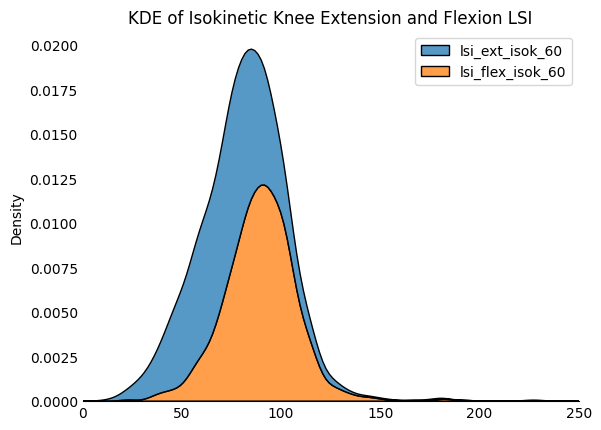

In [45]:
# We made a kde plot for both lsi extension and lsi flexion to understand what 
# their basic distributions look like

d1 = data[['lsi_ext_isok_60', 'lsi_flex_isok_60']]
sns.kdeplot(d1, multiple='stack')
plt.title('KDE of Isokinetic Knee Extension and Flexion LSI')
plt.xlim(0, 250)
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# There are less flexion measurements overall compared to extension, 
# and the flexion lsi values are slightly higher than extension lsi, 
# though they both have unimodal peaks

## Examine Correlations

...

(0.0, 200.0)

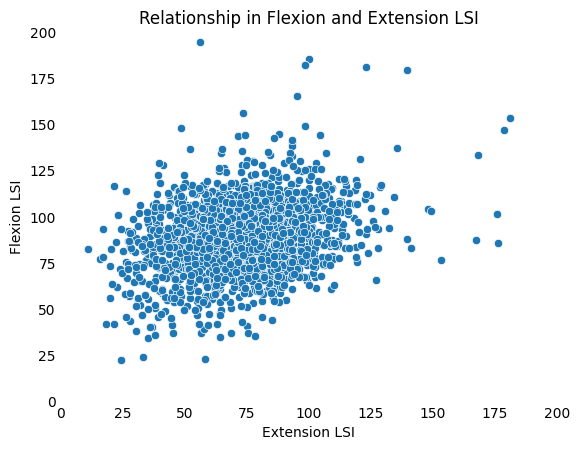

In [46]:
sns.scatterplot(data=data, x='lsi_ext_isok_60', y='lsi_flex_isok_60')
plt.title('Relationship in Flexion and Extension LSI')
plt.xlabel('Extension LSI')
plt.ylabel('Flexion LSI')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.ylim(0,200)
plt.xlim(0,200)

# By plotting the LSIs for flexion and extension, it may look like a blob at first, but 
# there seems to be a little bit of a positive correlation.
# This shows that perhaps Flexion and Extension LSIs tend to be similar for many patients.

#### Flexion LSI Over Time

In [47]:
data['redcap_event_name'].value_counts()

redcap_event_name
visit_1_arm_1        3276
visit_2_arm_1        1313
visit_3_arm_1         372
visit_4_arm_1         117
visit_5_arm_1          56
visit_6_arm_1          36
visit_9_arm_1          33
visit_7_arm_1          20
visit_8_arm_1          14
data_upload_arm_2       2
Name: count, dtype: int64

In [48]:
data['lsi_flex_isok_60'].groupby(data['redcap_event_name']).mean()

redcap_event_name
data_upload_arm_2          NaN
visit_1_arm_1        86.260421
visit_2_arm_1        91.778607
visit_3_arm_1        92.247613
visit_4_arm_1        93.090331
visit_5_arm_1        91.345113
visit_6_arm_1        90.966387
visit_7_arm_1        94.337597
visit_8_arm_1        93.832306
visit_9_arm_1        97.154199
Name: lsi_flex_isok_60, dtype: float64

From these tables, we can see that though the number of patients decreases over vists. On average, patients' LSI for flexion strength increases over time. Let's see this more clearly through a line graph.

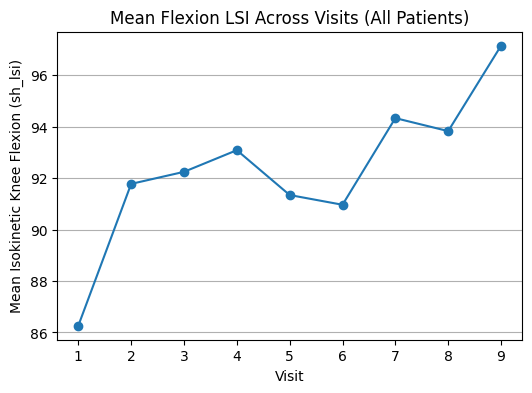

In [49]:
mean_lsi_f = data.groupby('redcap_event_name')['lsi_flex_isok_60'].mean().reset_index()

visit_order = ['visit_1_arm_1', 'visit_2_arm_1', 'visit_3_arm_1', 'visit_4_arm_1', 'visit_5_arm_1', 'visit_6_arm_1', 'visit_7_arm_1', 'visit_8_arm_1', 'visit_9_arm_1']
mean_lsi_f['redcap_event_name'] = pd.Categorical(
    mean_lsi_f['redcap_event_name'], 
    categories=visit_order, 
    ordered=True
)
mean_lsi_f = mean_lsi_f.sort_values('redcap_event_name')

visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9,
}

mean_lsi_f['visit_num'] = mean_lsi_f['redcap_event_name'].map(visit_map)
mean_lsi_f['visit_num'] = pd.to_numeric(mean_lsi_f['visit_num'], errors='coerce').astype('Int64')


# Plot
plt.figure(figsize=(6, 4))
plt.plot(mean_lsi_f['visit_num'].astype(str), mean_lsi_f['lsi_flex_isok_60'], marker='o')
plt.title('Mean Flexion LSI Across Visits (All Patients)')
plt.xlabel('Visit')
plt.ylabel('Mean Isokinetic Knee Flexion (sh_lsi)')
plt.grid(axis='y')

#plt.ylim(0, 2.5)

## Explore Relationships

#### Extension LSI and Sex

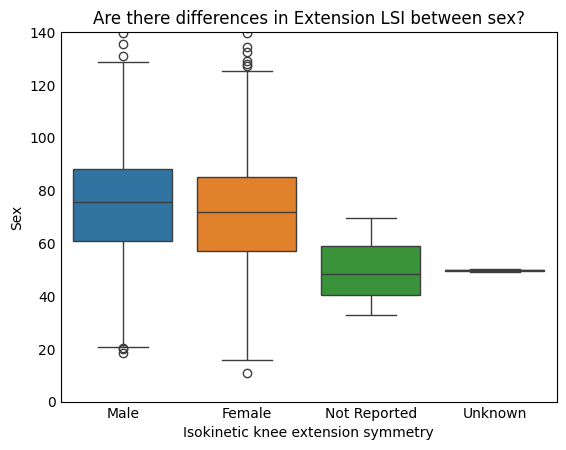

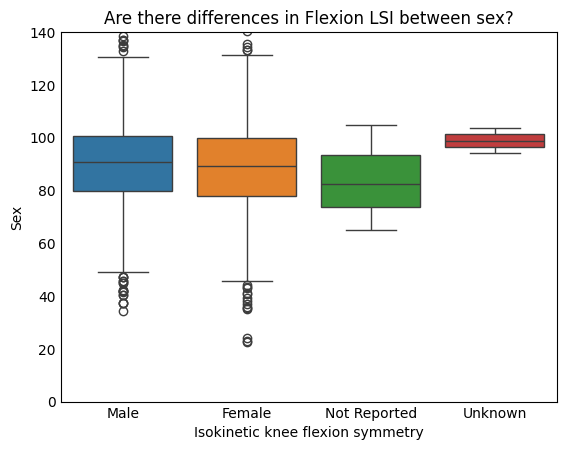

In [50]:
sns.boxplot(x='sex_dashboard', y='lsi_ext_isok_60', data=data, hue='sex_dashboard')
plt.title('Are there differences in Extension LSI between sex?')
plt.xlabel('Isokinetic knee extension symmetry')
plt.ylabel('Sex')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(0, 140)
plt.show()

sns.boxplot(x='sex_dashboard', y='lsi_flex_isok_60', data=data, hue='sex_dashboard')
plt.title('Are there differences in Flexion LSI between sex?')
plt.xlabel('Isokinetic knee flexion symmetry')
plt.ylabel('Sex')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(0, 140)
plt.show()

# We thought comparing some assessments/tests by sex might be meaningful due to 
# possible recovery differences
# After making boxplots grouped by sex for lsi, the sexes seem to perform more 
# similarly for flexion lsi than extension lsi. 
# For extension lsi, the percentiles and mean values for female are slightly lower than 
# male, though we're not sure how significant this is.

#### Single Hop LSI between Age Groups

(50.0, 130.0)

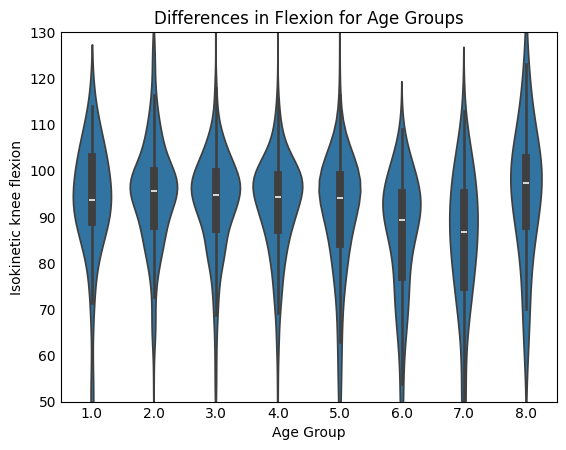

In [51]:
sns.violinplot(data=data, y='sh_lsi', x='age_group')
plt.title('Differences in Flexion for Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Isokinetic knee flexion')
plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)
plt.ylim(50, 130)

# It is important to note that the study has age groups, from younger to older
# As the ages increase, the single hop LSI decreases and then increases again

In [52]:
data.head()
data['sh_lsi'].groupby(data['age_group']).mean()

age_group
1.0    93.206574
2.0    94.556486
3.0    92.778385
4.0    92.025710
5.0    91.053036
6.0    85.359886
7.0    83.073559
8.0    95.357570
Name: sh_lsi, dtype: float64

We can see that the mean of single hop lsi per group somewhat decreases, where age groups 6 and 7 have the lowest symmetry.